# SMS Spam Collection Dataset

### Imports

In [1]:
import csv
import pandas as pd
import numpy as np
import pylab as pl
import json
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
import itertools
from sklearn.linear_model import LogisticRegression
from __future__ import print_function
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import nltk
from prettytable import PrettyTable
# from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer, precision_score, recall_score, f1_score
# from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

figsize = (24,6)
fontsize = 22

/home/nihira/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:

df = pd.read_json('yelp_academic_dataset_business.json', orient='columns', lines='true')


In [3]:
df.head()
df.tail()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
188588,"8000 McKnight Rd, Ste 570","{'AcceptsInsurance': 'False', 'BusinessAccepts...",sMQAZ3DkfrURFoJAyOhjEw,"Skin Care, Beauty & Spas, Day Spas, Massage",Pittsburgh,"{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",0,40.551152,-80.021213,Ross Massage,,15237,9,2.5,PA
188589,3341 Babcock Blvd,None,6hvuCibNS4uECetHb9MCQQ,"Fashion, Women's Clothing, Accessories, Bridal...",Pittsburgh,None,1,40.534242,-80.019556,Four Seasons Boutique,,15237,5,2.0,PA
188590,5825 Thunder Rd,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",KleCXFYOmdACcQUvf6_XEg,"Mobile Phones, Shopping, Department Stores, Fo...",Concord,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,35.378669,-80.724733,Walmart Supercenter,,28027,26,3.0,NC
188591,7601 Scott Padgett Pkwy,"{'BusinessAcceptsCreditCards': 'True', 'DogsAl...",3_fIsSxN2RBovQ_6EFtLzA,"Event Planning & Services, Hotels & Travel, Ho...",Concord,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,35.364366,-80.703454,Residence Inn Charlotte Concord,,28027,19,4.0,NC
188592,"3900 Paradise Rd, Ste R","{'BikeParking': 'True', 'BusinessAcceptsCredit...",NkOvIueadjFUxeCyq_uQEw,"Makeup Artists, Men's Clothing, Swimwear, Shop...",Las Vegas,"{'Tuesday': '11:0-19:0', 'Wednesday': '11:0-19...",1,36.118697,-115.154269,Tito Jimy Salon and Boutique,Eastside,89169,8,4.0,NV


In [4]:
df.shape

(188593, 15)

In [3]:
subset = df[df['categories'].str.contains("Beauty & Spas")==True]

Text(0,0.5,'No of Beauty & Spa')

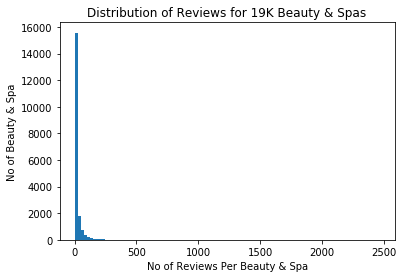

In [4]:
# subset.hist(column='review_count', bins=100)
axes = subset.hist(sharey=True, sharex=True, column='review_count', bins=100)
pl.grid(False)
pl.title("Distribution of Reviews for 19K Beauty & Spas")
pl.xlabel("No of Reviews Per Beauty & Spa")
pl.ylabel("No of Beauty & Spa")


### Reading the created csv file

In [5]:
subset.shape

(18967, 15)

In [6]:
subset.categories

14                                   Beauty & Spas, Barbers
34        Health & Medical, Hair Salons, Skin Care, Hair...
44                               Hair Salons, Beauty & Spas
63        Waxing, Nail Salons, Eyelash Service, Beauty &...
67                               Hair Salons, Beauty & Spas
74        Waxing, Blow Dry/Out Services, Hair Salons, Ha...
84        Beauty & Spas, Makeup Artists, Hair Salons, Ey...
91                               Nail Salons, Beauty & Spas
98                               Beauty & Spas, Nail Salons
130       Spray Tanning, Tanning Beds, Tanning, Beauty &...
162                              Beauty & Spas, Nail Salons
165       Doctors, Eyebrow Services, Tattoo Removal, Bea...
168                       Tanning, Beauty & Spas, Skin Care
186       Hair Salons, Hair Stylists, Beauty & Spas, Mak...
188       Health & Medical, Skin Care, Day Spas, Beauty ...
189       Beauty & Spas, Shopping, Specialty Schools, Ed...
190                              Hair Sa

In [7]:
df2 = subset.sort_values(by=['review_count'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6188d5dc88>]],
      dtype=object)

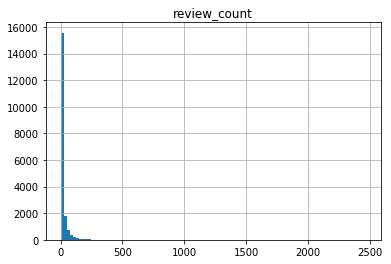

In [8]:
df2.hist(column='review_count', bins=100)

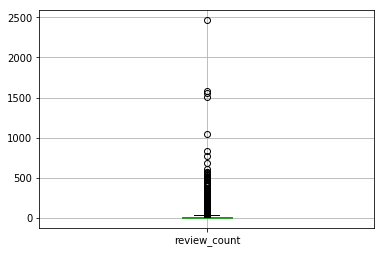

In [9]:
df2.boxplot(column='review_count')

In [10]:
df3 = df2[df2['review_count']>100]

In [11]:
df3.shape

(534, 15)

In [12]:
sampleBusiness = df3.sample(n=255, random_state=0)

In [13]:
sum(sampleBusiness['review_count'])

50340

In [14]:
businessIds = sampleBusiness['business_id'].tolist()

In [15]:
sampleReview = pd.DataFrame(columns=['review_id', 'user_id', 'business_id', 'stars', 'date', 'text', 'useful', 'funny', 'cool'])
count = 0
with open('yelp_academic_dataset_review.json', 'r') as f:
    for i, line in enumerate(f, start=1):
        if not (i % 10000):
            print(f'Parsed {i} lines')
        line_data = json.loads(line)
        if(line_data['business_id'] in businessIds):
            sampleReview.loc[count] = line_data
            count = count + 1
        

Parsed 10000 lines
Parsed 20000 lines
Parsed 30000 lines
Parsed 40000 lines
Parsed 50000 lines
Parsed 60000 lines
Parsed 70000 lines
Parsed 80000 lines
Parsed 90000 lines
Parsed 100000 lines
Parsed 110000 lines
Parsed 120000 lines
Parsed 130000 lines
Parsed 140000 lines
Parsed 150000 lines
Parsed 160000 lines
Parsed 170000 lines
Parsed 180000 lines
Parsed 190000 lines
Parsed 200000 lines
Parsed 210000 lines
Parsed 220000 lines
Parsed 230000 lines
Parsed 240000 lines
Parsed 250000 lines
Parsed 260000 lines
Parsed 270000 lines
Parsed 280000 lines
Parsed 290000 lines
Parsed 300000 lines
Parsed 310000 lines
Parsed 320000 lines
Parsed 330000 lines
Parsed 340000 lines
Parsed 350000 lines
Parsed 360000 lines
Parsed 370000 lines
Parsed 380000 lines
Parsed 390000 lines
Parsed 400000 lines
Parsed 410000 lines
Parsed 420000 lines
Parsed 430000 lines
Parsed 440000 lines
Parsed 450000 lines
Parsed 460000 lines
Parsed 470000 lines
Parsed 480000 lines
Parsed 490000 lines
Parsed 500000 lines
Parsed 51

Parsed 3970000 lines
Parsed 3980000 lines
Parsed 3990000 lines
Parsed 4000000 lines
Parsed 4010000 lines
Parsed 4020000 lines
Parsed 4030000 lines
Parsed 4040000 lines
Parsed 4050000 lines
Parsed 4060000 lines
Parsed 4070000 lines
Parsed 4080000 lines
Parsed 4090000 lines
Parsed 4100000 lines
Parsed 4110000 lines
Parsed 4120000 lines
Parsed 4130000 lines
Parsed 4140000 lines
Parsed 4150000 lines
Parsed 4160000 lines
Parsed 4170000 lines
Parsed 4180000 lines
Parsed 4190000 lines
Parsed 4200000 lines
Parsed 4210000 lines
Parsed 4220000 lines
Parsed 4230000 lines
Parsed 4240000 lines
Parsed 4250000 lines
Parsed 4260000 lines
Parsed 4270000 lines
Parsed 4280000 lines
Parsed 4290000 lines
Parsed 4300000 lines
Parsed 4310000 lines
Parsed 4320000 lines
Parsed 4330000 lines
Parsed 4340000 lines
Parsed 4350000 lines
Parsed 4360000 lines
Parsed 4370000 lines
Parsed 4380000 lines
Parsed 4390000 lines
Parsed 4400000 lines
Parsed 4410000 lines
Parsed 4420000 lines
Parsed 4430000 lines
Parsed 444000

In [16]:
sampleReviews = sampleReview

In [17]:
sampleReviews.shape

(50340, 9)

In [18]:
sampleReviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,cWKz6xtgzgTE4GyqmMMYBw,Rr4nRgrl3JVJPdDSz4__PA,K5XjxDyq3ZIjUhbtLaW4ZQ,4,2012-06-24,I'm not sure why there are so many negative co...,1,0,1
1,GxQhEd8Ot5AAW9szREwXew,60Z_adXWeE2rC2HDewnUVg,dp3Gs7uWo9GkNviwdR2_3w,5,2016-05-07,"I've been searching for a new hairstylist, sin...",1,0,1
2,3UkxlpG5PMlbgGtCp7W3PQ,qr9hmaIxq1z9ycgT28PpRw,CoGcHxwZNwG3gdMJey_UXQ,5,2011-09-03,I made an appointment in the morning to see Le...,0,0,0
3,41T5LjDnNe_M6ANOgmD_Xg,Lj4RyhGENeqqyt5tuYFxQA,okgI89cCzqz-M_TUPCeBew,5,2016-09-01,They responded to my inquiry promptly and were...,0,0,0
4,g657l_BmTVOwkE2QXFs66A,1cd1TjQEynOjhBT-3Qnsjg,-sAr-LA9TsIdl37UjwBlvg,4,2014-01-16,Great hotel with fabulous services and restaur...,0,0,0


In [19]:
userIds = sampleReviews['user_id'].tolist()

In [20]:
sampleUsers = pd.DataFrame(columns=['user_id', 'name', 'review_count', 'yelping_since', 'friends', 'useful', 'funny', 'cool', 'fans', 'elite', 'average_stars', 'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos'])
count = 0
with open('yelp_academic_dataset_user.json', 'r') as f:
    for i, line in enumerate(f, start=1):
        if not (i % 10000):
            print(f'Parsed {i} lines')
        line_data = json.loads(line)
        if(line_data['user_id'] in userIds):
            sampleUsers.loc[count] = line_data
            count = count + 1
        

Parsed 10000 lines
Parsed 20000 lines
Parsed 30000 lines
Parsed 40000 lines
Parsed 50000 lines
Parsed 60000 lines
Parsed 70000 lines
Parsed 80000 lines
Parsed 90000 lines
Parsed 100000 lines
Parsed 110000 lines
Parsed 120000 lines
Parsed 130000 lines
Parsed 140000 lines
Parsed 150000 lines
Parsed 160000 lines
Parsed 170000 lines
Parsed 180000 lines
Parsed 190000 lines
Parsed 200000 lines
Parsed 210000 lines
Parsed 220000 lines
Parsed 230000 lines
Parsed 240000 lines
Parsed 250000 lines
Parsed 260000 lines
Parsed 270000 lines
Parsed 280000 lines
Parsed 290000 lines
Parsed 300000 lines
Parsed 310000 lines
Parsed 320000 lines
Parsed 330000 lines
Parsed 340000 lines
Parsed 350000 lines
Parsed 360000 lines
Parsed 370000 lines
Parsed 380000 lines
Parsed 390000 lines
Parsed 400000 lines
Parsed 410000 lines
Parsed 420000 lines
Parsed 430000 lines
Parsed 440000 lines
Parsed 450000 lines
Parsed 460000 lines
Parsed 470000 lines
Parsed 480000 lines
Parsed 490000 lines
Parsed 500000 lines
Parsed 51

In [118]:
sampleUsers.shape

(43332, 22)

In [119]:
sampleUsers.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,DMJfDuXSswX9Gyt1UcmJpw,Leo,2,2015-08-21,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,N8rnN-vBSKICcTMlhLgNOw,Bingo,18,2014-01-27,None,7,2,2,0,None,...,0,0,0,0,0,0,0,0,0,0
2,3iNM5vT33PhjmXC7jglusw,Brian,6,2013-05-31,None,0,1,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,SS5qLDpUkrHmvvlMTo0KCw,Rick,4,2015-05-25,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,e_S4E7aa7k47YrDsui_XGA,Susan,14,2013-09-10,None,2,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0


In [21]:
sampleUsers.to_csv("sample_users_BS.csv")

In [22]:
sampleReviews.to_csv("sample_reviews_BS.csv")

In [23]:
sampleBusiness.to_csv("sample_business_BS.csv")

In [24]:

samB = pd.read_csv('sample_business_BS.csv')


In [25]:
samB.shape

(255, 16)

In [26]:
samB.head()

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,60758,4950 S Rainbow Blvd,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",sBIT-DM6clmy_FT2qZhXZw,"Beauty & Spas, Day Spas, Nail Salons",Las Vegas,"{'Monday': '9:30-19:0', 'Tuesday': '9:30-19:0'...",1,36.098579,-115.242444,LT Nails and Spa,Spring Valley,89118,123,4.5,NV
1,54329,"4328 N Wells Fargo Ave, Ste 2","{'BikeParking': 'True', 'BusinessAcceptsCredit...",xiNJk32NYbXdL-T3PzE3lQ,"Hair Removal, Beauty & Spas, Skin Care, Hair S...",Scottsdale,"{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",0,33.499149,-111.923063,Salon D'Shayn,NaN,85251,256,4.5,AZ
2,165895,"500 E Windmill Ln, Ste 110","{'BikeParking': 'True', 'BusinessAcceptsBitcoi...",sqnr6XgcNNk26GHPq1_IpA,"Hair Salons, Skin Care, Makeup Artists, Hair E...",Las Vegas,"{'Tuesday': '12:0-19:0', 'Wednesday': '12:0-19...",1,36.042858,-115.152054,Detox Salon,Southeast,89123,127,5.0,NV
3,118536,1616 W Ruby Dr,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",dEi4_bO8ydNHgcRNKV8q6g,"Fitness & Instruction, Sports Clubs, Gyms, Act...",Tempe,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,33.340286,-111.964733,Life Time Fitness,NaN,85284,202,3.5,AZ
4,46280,9777 S Las Vegas Blvd,"{'BusinessAcceptsCreditCards': 'True', 'DogsAl...",p0iEUamJVp_QpaheE-Nz_g,"Day Spas, Arts & Entertainment, Hotels & Trave...",Las Vegas,"{'Monday': '7:0-7:0', 'Tuesday': '7:0-7:0', 'W...",1,36.011357,-115.175775,"South Point Hotel, Casino & Spa",Southeast,89183,1514,3.5,NV


In [27]:
samU = pd.read_csv('sample_users_BS.csv')

In [28]:
samU.shape

(44765, 23)

In [29]:
samU.head()

,Unnamed: 0,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,0,Nq9WrJcCjQjHSoaUPZcPWg,F,10,2015-10-04,None,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B3xwUPXMlCb7_5IEDlq4Uw,Yolie,8,2012-01-02,"YwaKGmRNnSa3R3N4Hf9jLw, NDjDKV7IWeqS_kvdlNS9zw...",6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,OQSya1DStf-2a3o9dcHXug,Brittany,7,2012-01-15,None,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Tk71YqpBKzGFTbMiJxfNYw,Chanel,2,2014-06-27,None,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,9GcGbH1batgsB-ZEPr0TjQ,Mitch,1,2010-09-09,None,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
samR = pd.read_csv('sample_reviews_BS.csv')

In [31]:
samR.shape

(50340, 10)

In [32]:
samR.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,0,cWKz6xtgzgTE4GyqmMMYBw,Rr4nRgrl3JVJPdDSz4__PA,K5XjxDyq3ZIjUhbtLaW4ZQ,4,2012-06-24,I'm not sure why there are so many negative co...,1,0,1
1,1,GxQhEd8Ot5AAW9szREwXew,60Z_adXWeE2rC2HDewnUVg,dp3Gs7uWo9GkNviwdR2_3w,5,2016-05-07,"I've been searching for a new hairstylist, sin...",1,0,1
2,2,3UkxlpG5PMlbgGtCp7W3PQ,qr9hmaIxq1z9ycgT28PpRw,CoGcHxwZNwG3gdMJey_UXQ,5,2011-09-03,I made an appointment in the morning to see Le...,0,0,0
3,3,41T5LjDnNe_M6ANOgmD_Xg,Lj4RyhGENeqqyt5tuYFxQA,okgI89cCzqz-M_TUPCeBew,5,2016-09-01,They responded to my inquiry promptly and were...,0,0,0
4,4,g657l_BmTVOwkE2QXFs66A,1cd1TjQEynOjhBT-3Qnsjg,-sAr-LA9TsIdl37UjwBlvg,4,2014-01-16,Great hotel with fabulous services and restaur...,0,0,0
